#### CSML1020 Course Project - New Plant Diseases Dectection
#### Authors (Group 3): Paul Doucet, Jerry Khidaroo

#### Initilization

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os

In [5]:
# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [6]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

#### Data Preparation

In [4]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [5]:
def remove_suffix(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

In [6]:
def get_file_count(src_path):
    listOfFile = !gsutil ls src_path
    file_count = len(listOfFile)
    #file_count = 0
    #for entry in listOfFile:
        #file_count = file_count + 1
    print(src_path, ' ', file_count)
    
    return file_count

In [7]:
# List of all directories and file counts in given path
def getDirCounts(dirName):
    listOfFile = !gsutil ls "gs://npd-bucket/NewPlantDiseasesDatasetSample/train/"
    #listOfFile
    rows = []
    i = 0
    # Iterate over all the entries
    for entryFull in listOfFile:
#         i = i + 1
#         if i > 2:
#             break
        entry = remove_prefix(entryFull, dirName)
        #print(entry)
        
        fields = entry.split("___")
        if fields[1] == 'healthy':
            status = 'healthy'
        else:
            status = "unhealthy"
            
        disease = fields[1].split("_")[-1].replace(")","").lower()
        #         img_path = remove_prefix(entryFull, "'")
        #         img_path = remove_suffix(img_path, "'")
        #         img_path = "\"" + img_path + "\""
        #img_path = str(entryFull)
        #img_path = "\"" + img_path + "\""
        #listOfImgs = !gsutil ls "'" +  img_path + "'"
        #res = [j.strip("[]").split(", ") for j in listOfImgs] 
        noOfFiles = 50 # len(listOfImgs)

        #noOfFiles = get_file_count(entryFull) # 0 #sum([len(files) for r, d, files in os.walk(fullPath)])
        #print(entryFull, ' ', noOfFiles)
        #print(listOfImgs)
        rows.append([fields[0], remove_suffix(fields[1], "/"), noOfFiles, status, remove_suffix(disease, "/")])

    df = pd.DataFrame(rows, columns=["plant", "condition", "count", "status", "disease"])
    #df['plant_status'] = df['plant'] + ' - ' + df['status']
    return df

In [8]:
# # List of all directories and file counts in given path
# def getDirCounts(dirName):
#     listOfFile = os.listdir(dirName)
#     rows = []
#     # Iterate over all the entries
#     for entry in listOfFile:
#         # Create full path
#         fullPath = os.path.join(dirName, entry)
#         if os.path.isdir(fullPath):
#             fields = entry.split("___")
#             if fields[1] == 'healthy':
#                 status = 'healthy'
#             else:
#                 status = "unhealthy"
            
#             disease = fields[1].split("_")[-1].replace(")","").lower()
            
#             noOfFiles = sum([len(files) for r, d, files in os.walk(fullPath)])
#             rows.append([fields[0], fields[1], noOfFiles, status, disease])

#     df = pd.DataFrame(rows, columns=["plant", "condition", "count", "status", "disease"])
#     #df['plant_status'] = df['plant'] + ' - ' + df['status']
#     return df

In [16]:
# dataDirTrain = "gs://npd-bucket/NewPlantDiseasesDatasetSample/train/"
# dataDirValidate = "gs://npd-bucket/NewPlantDiseasesDatasetSample/valid/"
# dataDirTest = "gs://npd-bucket/NewPlantDiseasesDatasetSample/test/"
dataDirTrain = "/home/jkhidaroo/NewPlantDiseasesDatasetSample/NewPlantDiseasesDatasetSample/train"
dataDirValidate = "/home/jkhidaroo/NewPlantDiseasesDatasetSample/NewPlantDiseasesDatasetSample/valid/"
dataDirTest = "/home/jkhidaroo/NewPlantDiseasesDatasetSample/NewPlantDiseasesDatasetSample/test/"

In [10]:
# Get the list of all files in directory tree at given path
plants_df = getDirCounts(dataDirTrain)
plants_df

,plant,condition,count,status,disease
0,Apple,Apple_scab,50,unhealthy,scab
1,Apple,Black_rot,50,unhealthy,rot
2,Apple,Cedar_apple_rust,50,unhealthy,rust
3,Apple,healthy,50,unhealthy,healthy
4,Blueberry,healthy,50,unhealthy,healthy
5,Cherry_(including_sour),Powdery_mildew,50,unhealthy,mildew
6,Cherry_(including_sour),healthy,50,unhealthy,healthy
7,Corn_(maize),Cercospora_leaf_spot_Gray_leaf_spot,50,unhealthy,spot
8,Corn_(maize),Common_rust,50,unhealthy,rust
9,Corn_(maize),Northern_Leaf_Blight,50,unhealthy,blight


#### Data Exploration

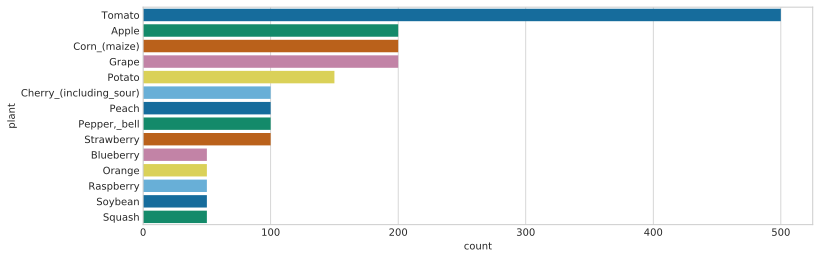

In [11]:
# number of images by plant
plant_images_sum_df = plants_df.groupby(by=['plant'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
sns.barplot(y='plant', x='count', data=plant_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", ax=ax1);

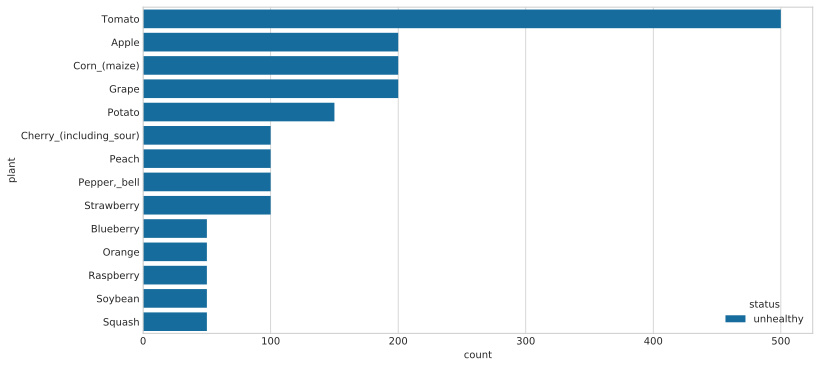

In [12]:
# number of images by plant (healthy and healthy)
plant_status_images_sum_df = plants_df.groupby(by=['plant','status'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 6), ncols=1, sharex=True)
sns.barplot(y='plant', x='count', data=plant_status_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", hue='status', ax=ax1);

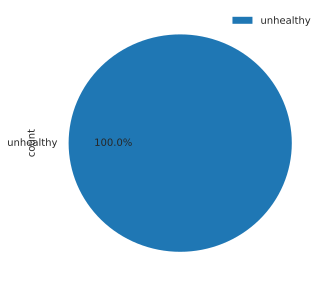

In [13]:
# Relative image percentages by health status
status_images_sum_df = plants_df.groupby(by=['status'], as_index=False)[plants_df.columns[:-2]].sum()
plot = status_images_sum_df.plot.pie(y='count', labels=status_images_sum_df['status'], autopct='%1.1f%%',  figsize=(5, 5))

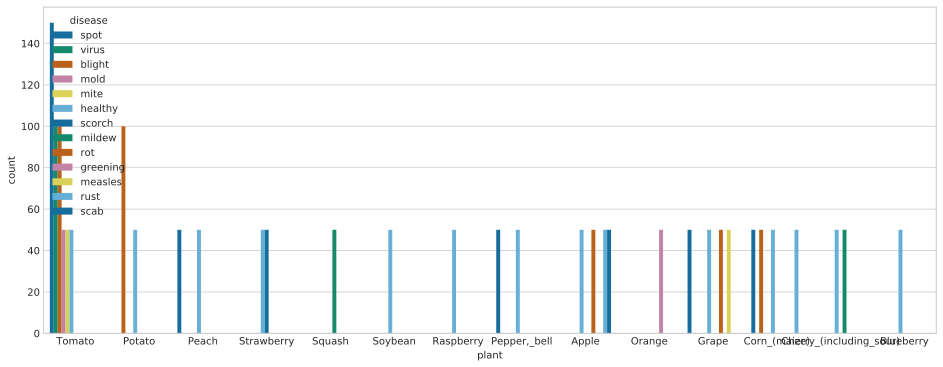

In [14]:
# number of images by plant per disease
plant_diseases_images_sum_df = plants_df.groupby(by=['plant','disease'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(16, 6), ncols=1, sharex=True)
sns.barplot(y='count', x='plant', data=plant_diseases_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", hue='disease', ax=ax1);

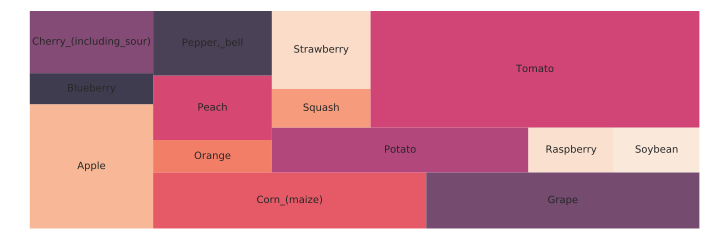

In [15]:
# Relative size visualization of images by plant
import squarify

fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
squarify.plot(sizes=plant_images_sum_df['count'], label=plant_images_sum_df['plant'], alpha=.8, ax=ax1)
plt.axis('off')
plt.show()

In [16]:
# # Relative size visualization of images by plant disease
# import plotly.express as px

# plant_diseases_images_sum_df["plants"] = "plants" # in order to have a single root node
# fig = px.treemap(plant_diseases_images_sum_df, path=['plants', 'plant', 'disease'], values='count',
#                   color='disease', 
#                   hover_data=['disease'],
#                   range_color=[0.5, 8.5],
#                   color_discrete_map={'(?)':'black', 'healthy':'lightgreen', 'blight':'darkblue', 'greening':'green', 'measles':'purple', 'mildew':'cyan', 'mite':'lightblue', 'mold':'pink', 'rot':'gold', 'rust':'darkred', 'scab':'darkgrey', 'scorch':'yellow', 'spot':'lightgray', 'virus':'red'},
#                 #   color_continuous_scale='RdBu_R',
#                   width=1200, height=600
#                   )

# fig.show()

In [17]:
#!pip install plotly

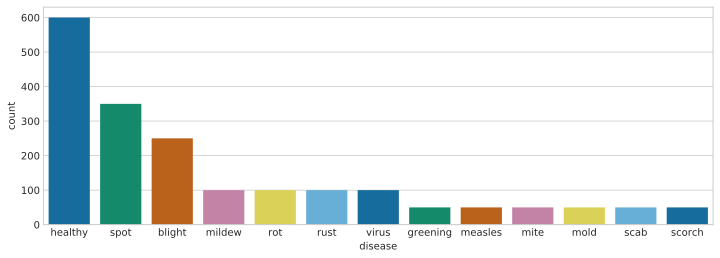

In [18]:
# number of images by disease
disease_images_sum_df = plants_df.groupby(by=['disease'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
sns.barplot(y='count', x='disease', data=disease_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", ax=ax1);

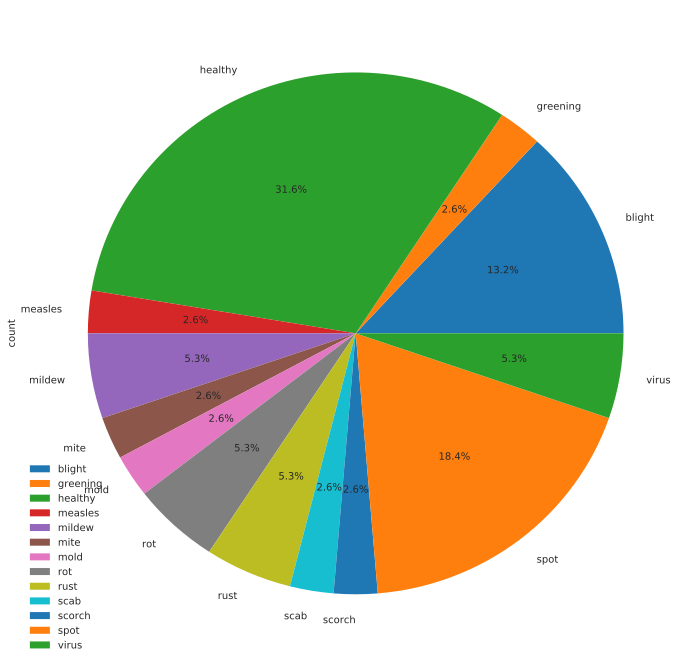

In [19]:
# Relative image percentages by disease
plot = disease_images_sum_df.plot.pie(y='count', labels=disease_images_sum_df['disease'], autopct='%1.1f%%',  figsize=(12, 12))

In [1]:
#!pip install --upgrade pip

In [2]:
#!pip install --ignore-installed --upgrade tensorflow==2.1

In [5]:
import tensorflow as tf


In [16]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# for physical_device in physical_devices:
#     tf.config.experimental.set_memory_growth(physical_device, True)

In [3]:
#!pip install keras==2.1.5

In [7]:
dataDirTrain = "/home/jkhidaroo/NewPlantDiseasesDatasetSample/NewPlantDiseasesDatasetSample/train"
dataDirValidate = "/home/jkhidaroo/NewPlantDiseasesDatasetSample/NewPlantDiseasesDatasetSample/valid/"
dataDirTest = "/home/jkhidaroo/NewPlantDiseasesDatasetSample/NewPlantDiseasesDatasetSample/test/"

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras
from sklearn.model_selection import train_test_split
#from keras import backend
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

# batch_size = 128
batch_size = 48
training_set = train_datagen.flow_from_directory(dataDirTrain,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(dataDirValidate,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 1900 images belonging to 38 classes.
Found 1900 images belonging to 38 classes.


In [18]:
#!ls /home/jkhidaroo/NewPlantDiseasesDatasetSample

In [19]:
class_dict = training_set.class_indices
print(class_dict)

{'Tomato___Target_Spot': 34, 'Tomato___healthy': 37, 'Tomato___Leaf_Mold': 31, 'Squash___Powdery_mildew': 25, 'Grape___healthy': 14, 'Tomato___Spider_mites_Two-spotted_spider_mite': 33, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Raspberry___healthy': 23, 'Corn_(maize)___Common_rust': 8, 'Peach___healthy': 17, 'Strawberry___healthy': 27, 'Apple___healthy': 3, 'Grape___Esca_(Black_Measles)': 12, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Tomato___Bacterial_spot': 28, 'Soybean___healthy': 24, 'Blueberry___healthy': 4, 'Tomato___Early_blight': 29, 'Cherry_(including_sour)___healthy': 6, 'Apple___Cedar_apple_rust': 2, 'Potato___healthy': 22, 'Tomato___Late_blight': 30, 'Pepper,_bell___healthy': 19, 'Tomato___Septoria_leaf_spot': 32, 'Apple___Black_rot': 1, 'Tomato___Tomato_mosaic_virus': 36, 'Apple___Apple_scab': 0, 'Grape___Black_rot': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Peach___Bacterial_spot': 16, 'Strawberry___Leaf_

In [20]:
li = list(class_dict.keys())
print(li)

['Tomato___Target_Spot', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Squash___Powdery_mildew', 'Grape___healthy', 'Tomato___Spider_mites_Two-spotted_spider_mite', 'Cherry_(including_sour)___Powdery_mildew', 'Raspberry___healthy', 'Corn_(maize)___Common_rust', 'Peach___healthy', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Esca_(Black_Measles)', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Bacterial_spot', 'Soybean___healthy', 'Blueberry___healthy', 'Tomato___Early_blight', 'Cherry_(including_sour)___healthy', 'Apple___Cedar_apple_rust', 'Potato___healthy', 'Tomato___Late_blight', 'Pepper,_bell___healthy', 'Tomato___Septoria_leaf_spot', 'Apple___Black_rot', 'Tomato___Tomato_mosaic_virus', 'Apple___Apple_scab', 'Grape___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___Bacterial_spot', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___

In [21]:
train_num = training_set.samples
valid_num = valid_set.samples

## Model Preparation

In [22]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58900480/58889256 [==============================] - 1s 0us/step


In [24]:
classifier=tensorflow.keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(38,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 38)                953382    
Total params: 15,668,070
Trainable params: 953,382
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=3,
                         validation_steps=valid_num//batch_size,
                         )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 39 steps, validate for 39 steps
Epoch 1/3
39/39 [==============================] - 923s 24s/step - loss: 2.9751 - accuracy: 0.2954 - val_loss: 1.4994 - val_accuracy: 0.5411
Epoch 2/3
39/39 [==============================] - 928s 24s/step - loss: 1.1239 - accuracy: 0.6830 - val_loss: 0.9458 - val_accuracy: 0.7249
Epoch 3/3
39/39 [==============================] - 916s 23s/step - loss: 0.7931 - accuracy: 0.7646 - val_loss: 0.9405 - val_accuracy: 0.7121


In [27]:
#Saving our model
filepath="./Mymodel.h5"
classifier.save(filepath)

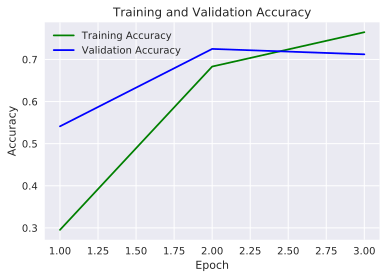

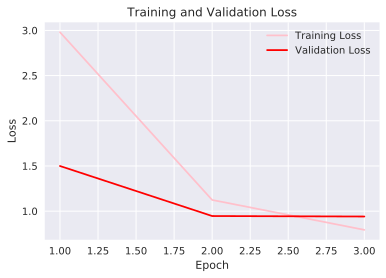

In [28]:
# import matplotlib.pyplot as plt
# import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/home/jkhidaroo/NewPlantDiseasesDatasetSample/NewPlantDiseasesDatasetSample/test/Tomato_Late_blight01.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

IOError: [Errno 2] No such file or directory: '/home/jkhidaroo/NewPlantDiseasesDatasetSample/test/Tomato_Late_blight01.JPG'